In [92]:
import time
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
from pymoo.optimize import minimize
from pymoo.algorithms.nsga2 import nsga2
from pymoo.util import plotting
from pymop.factory import get_problem
from pymoo.indicators.hv import Hypervolume

In [111]:
DEFAULT_FIGSIZE = (10, 6)


def perf_hypervolume(res, figsize=DEFAULT_FIGSIZE):
    # create the performance indicator object with reference point (4,4)
    metric = Hypervolume(ref_point=np.array([1.0, 1.0]))

    # collect the population in each generation
    pop_each_gen = [a.pop for a in res.history]

    # receive the population in each generation
    obj_and_feasible_each_gen = [pop[pop.get("feasible")[:,0]].get("F") for pop in pop_each_gen]

    # calculate for each generation the HV metric
    hv = [metric.calc(f) for f in obj_and_feasible_each_gen]

    # visualze the convergence curve
    plt.figure(figsize=figsize, dpi=80)
    plt.plot(np.arange(len(hv)), hv, '-o')
    plt.title("Convergence")
    plt.xlabel("Generation")
    plt.ylabel("Hypervolume")
    plt.show()


def plot_results(problem_name, res, pf, figsize=DEFAULT_FIGSIZE):
    print('{} results\n'.format(problem_name.upper()))
    plt.figure(figsize=figsize, dpi=80)
    plt.title('Optimal Pareto-Front for {}'.format(problem_name.upper()))
    plotting.plot(pf)
    plt.figure(figsize=figsize, dpi=80)
    plt.title('NSGA-II results')
    plotting.plot(res.F, no_fill=True)


def run_nsga2(problem_name, N=100, T=200, figsize=DEFAULT_FIGSIZE):
    # load a test or define your own problem
    problem = get_problem(problem_name)
    pf = problem.pareto_front()

    # create the algorithm object
    method = nsga2(pop_size=N, elimate_duplicates=True)

    # execute the optimization
    res = minimize(problem,
                   method,
                   termination=('n_gen', T),
                   pf=pf,
                   save_history=True,
                   disp=False)

    plot_results(problem_name, res, pf, figsize)
    perf_hypervolume(res, figsize)

ZDT1 results



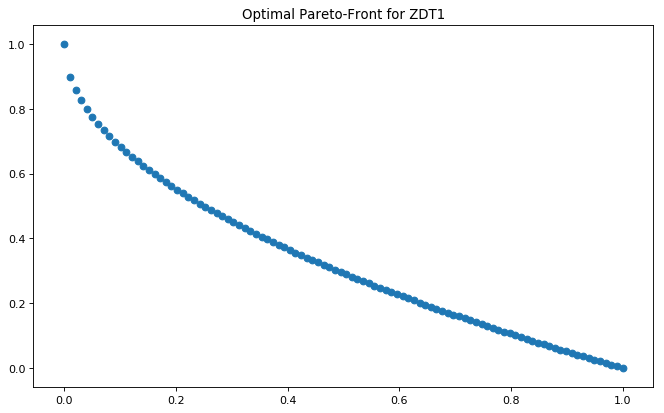

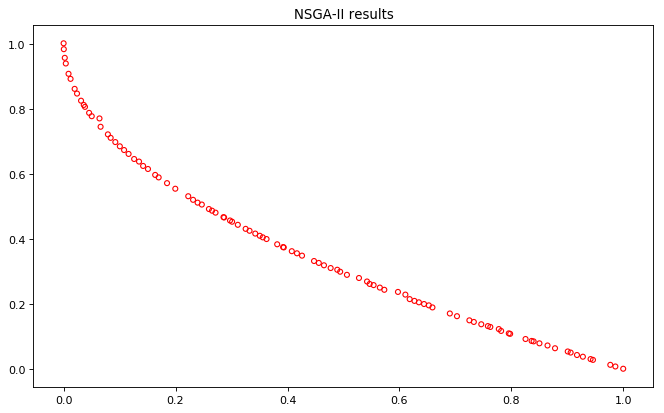

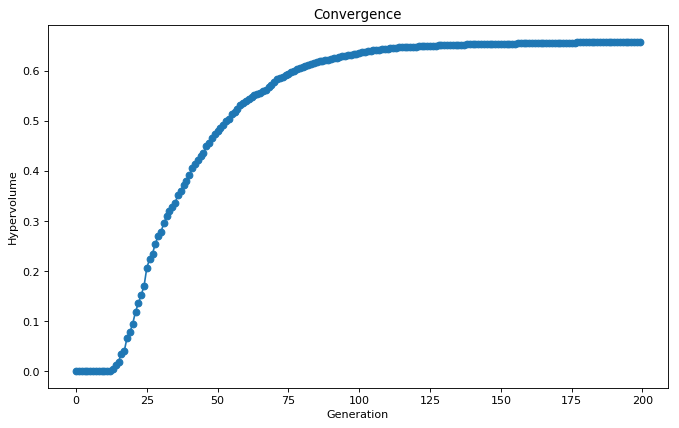

In [112]:
params = {
    'problem_name': 'zdt1',
    'N': 100,
    'T': 200,
}
run_nsga2(**params)

ZDT2 results



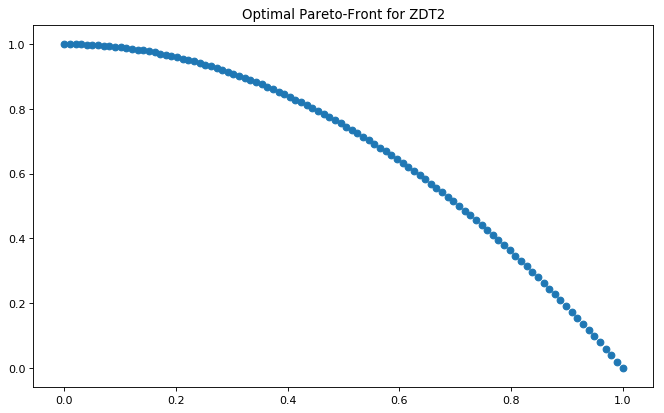

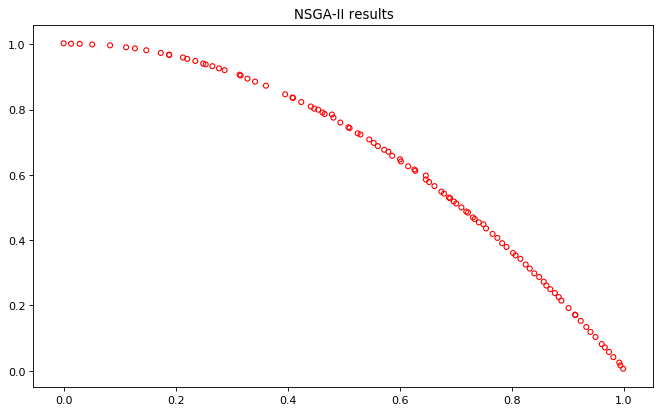

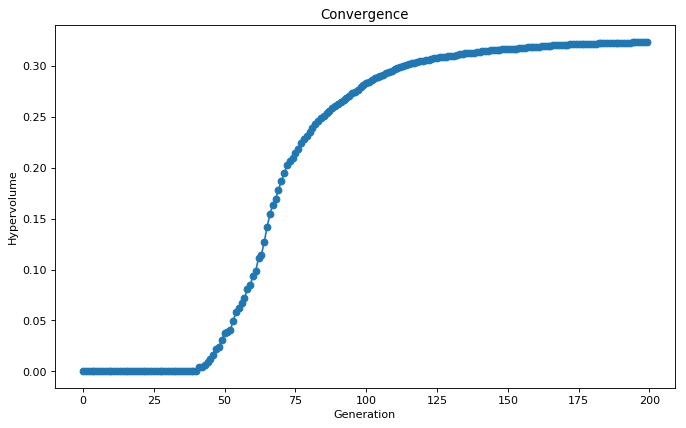

In [113]:
params = {
    'problem_name': 'zdt2',
    'N': 100,
    'T': 200,
}
run_nsga2(**params)

ZDT3 results



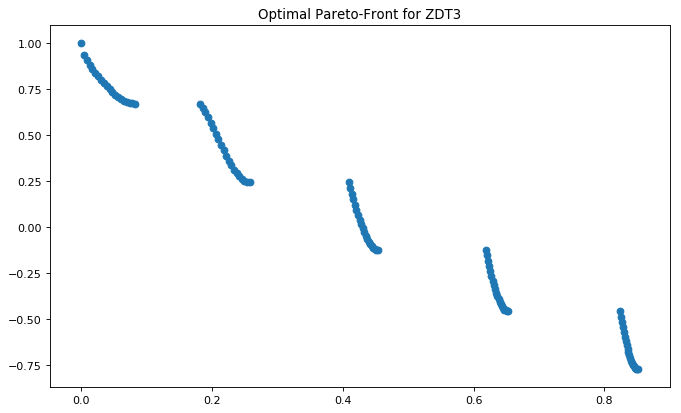

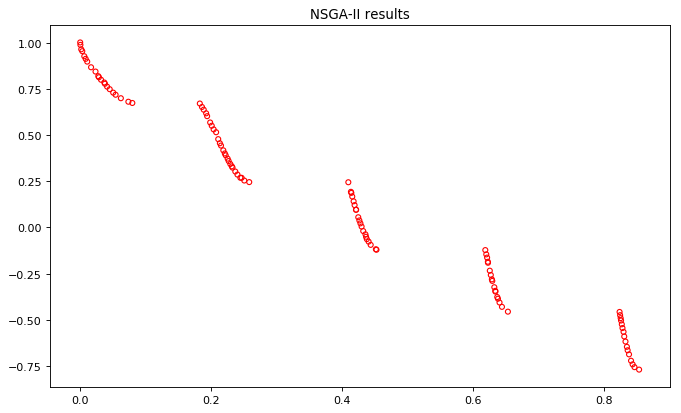

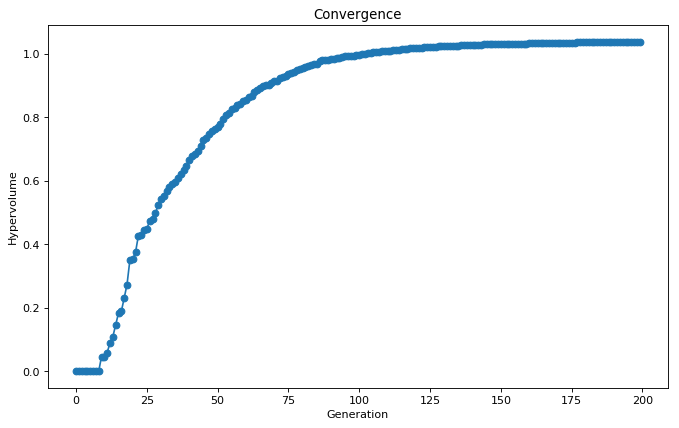

In [114]:
params = {
    'problem_name': 'zdt3',
    'N': 100,
    'T': 200,
}
run_nsga2(**params)

ZDT4 results



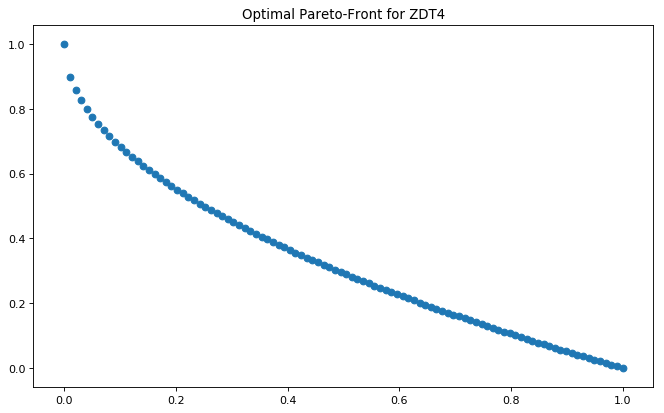

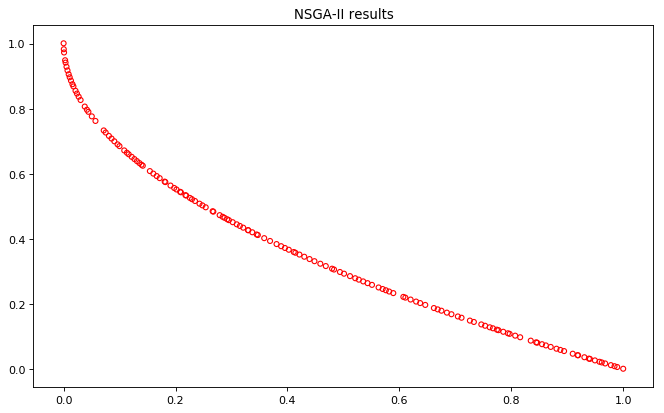

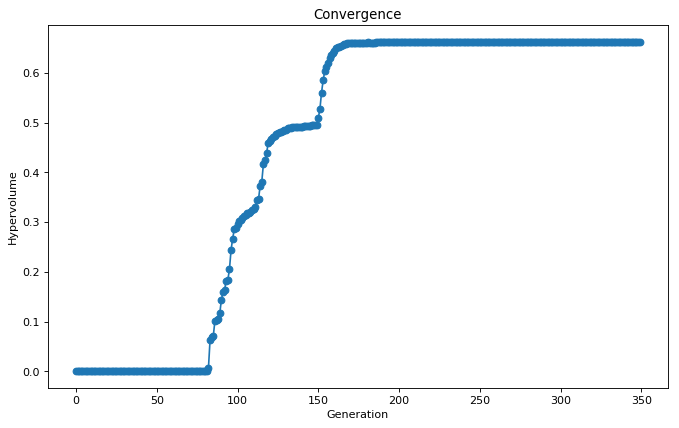

In [119]:
params = {
    'problem_name': 'zdt4',
    'N': 150,
    'T': 350,
}
run_nsga2(**params)

ZDT6 results



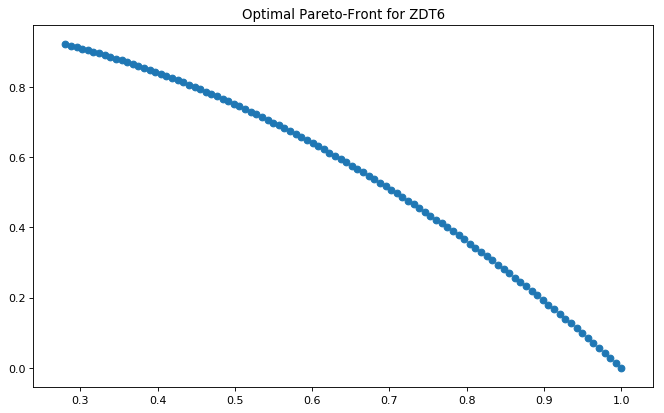

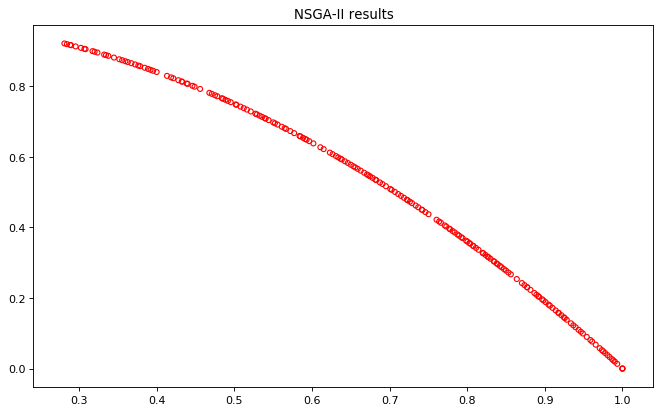

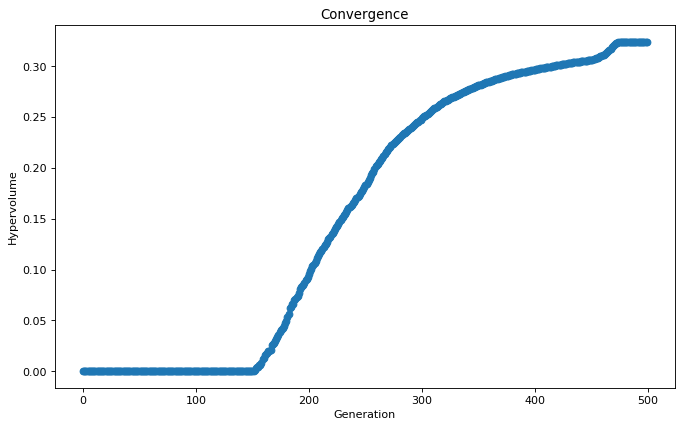

In [122]:
params = {
    'problem_name': 'zdt6',
    'N': 200,
    'T': 500,
}
run_nsga2(**params)